In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
import seaborn as sns
import sys
import os
from os.path import join

import tensorflow as tf
from keras.applications.resnet import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

from tensorflow.python.compiler.tensorrt import trt_convert as trt

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import image
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from keras.preprocessing import image
# from keras.applications import ResNet50

print(tf.version.VERSION)

2.1.0


In [48]:
PATH = "../data/DermMel/"
print(os.listdir(PATH))

['valid', '.DS_Store', 'test', 'train', '.ipynb_checkpoints']


In [49]:
PATHtrain = PATH + 'train/'
PATHtest = PATH + 'test/'
PATHvalid = PATH + 'valid/'

In [50]:
mel_model = load_model('../assets/model.h5')

In [51]:
mel_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 126,351,234
Trainable params: 102,763,522
Non-trainable params: 23,587,712
_______________________________

In [80]:
# dimensions of our images
img_width, img_height = 224, 224

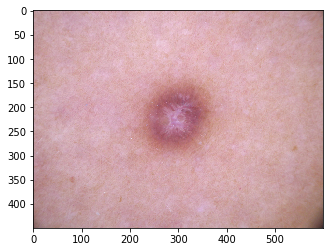

In [88]:
jl = mpimg.imread('../test_images/non_m.jpg')
plt.imshow(jl) 

In [87]:
# predicting images
img = image.load_img('../test_images/mel.jpeg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


images = np.vstack([x])
classes = mel_model.predict_classes(images, batch_size=1)
print(classes)

# print the classes, the images belong to
# print(classes)
# print(classes[0])

[0]
